# Decision Tree Optimization

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [14]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1. Build the DataFrame and Define the ML Problem

####  Load a Data Set and Save it as a Pandas DataFrame

We will work with a new version of "cell2celltrain" that already has all the necessary data preparation steps implemented, including one-hot encoding of the categorical values.

In [16]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "cell2celltrain_df.csv")
df = pd.read_csv(filename, header=0)

#### Inspect the Data

In [17]:
df.shape

(51047, 85)

In [18]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
0,3000002,True,False,False,True,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3000010,True,True,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000014,False,True,False,False,False,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3000022,False,False,False,True,False,False,True,True,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000026,True,False,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Define the Label

Once again, this is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

Our features will be all of the remaining columns in the data set. Inspect the columns in DataFrame `df` below to get an idea of the different features that will be used for model training.

In [19]:
list(df.loc[:, df.columns != 'Churn'])

['CustomerID',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'HomeownershipKnown',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCr

## Step 2: Create Labeled Examples from the Data Set for the Model Training Phase


Let's obtain columns from our data set to create labeled examples. 
In the code cell below carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Assign all other columns from DataFrame `df` to the variable `X`. These will be our features. 


In [20]:
y = df['Churn']
X = df.drop(columns='Churn')
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 51047

Number of Features:84
['CustomerID', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCre

In [21]:
x = df.drop

## Step 3: Create Training and Test Data Sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [23]:
print(X_train.shape)
print(X_test.shape)

(35732, 84)
(15315, 84)


## Step 4: Train and Evaluate the Model:
### Fit a Decision Tree Classification Model and Evaluate the Accuracy of the Model

The function expects the test and train datasets as well as a values for:

  1. leaf = The minimum number of samples required to be at a leaf node 
  2. depth = The maximum depth of the tree
  3. crit = The function to be used to measure the quality of a split. If this argument is not specified, the default is 'gini.' We specified 'entropy'.


In [24]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
     # 1. Create the  DecisionTreeClassifier model object below and assign to variable 'model'
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

#### Train on Different Hyperparameter Values

The code cell trains two Decision Tree classifiers using `train_test_DT()`:

- one with a low value of depth: `max_depth = 8`
- one high value of depth: `max_depth = 32`


In [25]:
max_depth_range = [8, 32]

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

    

Max Depth=8, accuracy score: 0.7108063989552726
Max Depth=32, accuracy score: 0.620241593209272


Let's visualize the results.

<>:5: SyntaxWarning: invalid escape sequence '\_'
<>:5: SyntaxWarning: invalid escape sequence '\_'
/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_28399/2383467995.py:5: SyntaxWarning: invalid escape sequence '\_'
  plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')


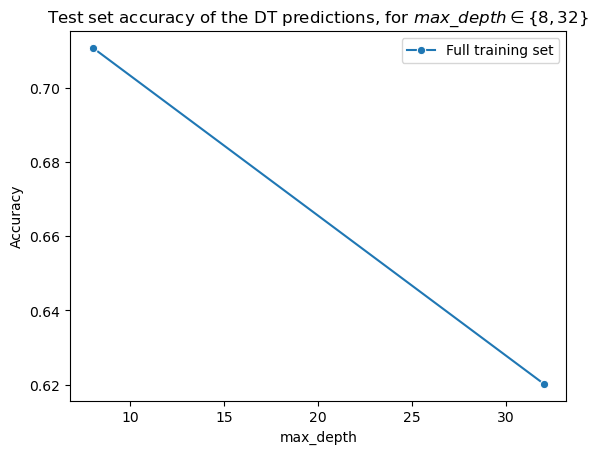

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()



Let's work with more values for max depth.

The code bellow trains six Decision Tree classifiers with different values of `max_depth`.
Inspect the accuracy scores and note the optimal value for `max_depth`.



In [27]:
max_depth_range = [2**i for i in range(6)] 
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))
    
      


Accuracy scores:
Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=8, accuracy score: 0.7106758080313418
Max Depth=16, accuracy score: 0.6637936663401893
Max Depth=32, accuracy score: 0.6159973881815214


Let's visualize the results

<>:6: SyntaxWarning: invalid escape sequence '\_'
<>:6: SyntaxWarning: invalid escape sequence '\_'
/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_28399/2887927827.py:6: SyntaxWarning: invalid escape sequence '\_'
  plt.title('Test set accuracy of the DT predictions, for $max\_depth\in(2^0, 2^{5})$')


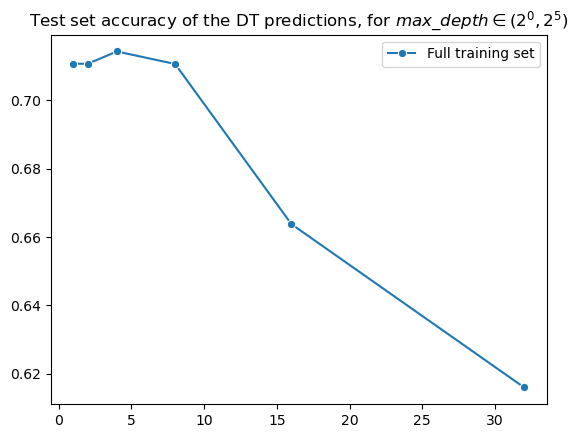

In [28]:
x = max_depth_range
    
fig = plt.figure()
p_grid = sns.lineplot(x=x, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in(2^0, 2^{5})$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()



## Deep Dive: Identify the Most Important Features

Every time we fit a `sklearn` decision tree model to the data, the resulting `model` object will contain an attribute that stores the importance scores for all features in the data:

In [29]:
model = DecisionTreeClassifier(min_samples_leaf = 100, max_depth = 20, criterion = 'entropy')
model.fit(X_train, y_train)

fi = model.feature_importances_
fi[:5]

array([0.05166069, 0.00161232, 0.01458367, 0.01012555, 0.        ])

Let us sort the feature *names* by their importance:

In [30]:
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]

We are now ready to plot the top 10 most predictive features on which the examples were split:

Text(0, 0.5, 'Normalized importance')

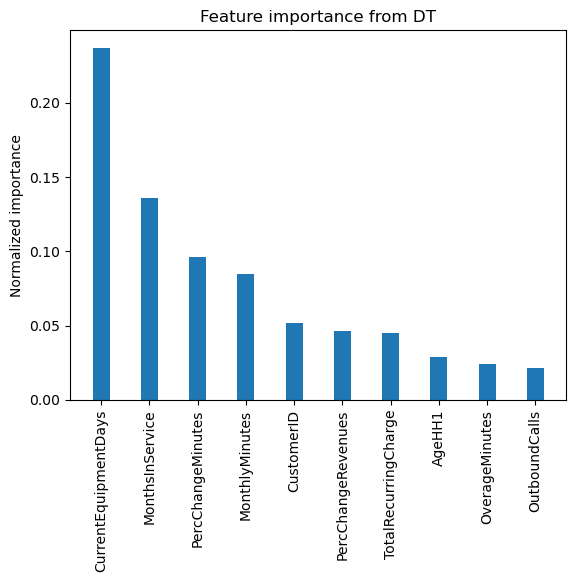

In [31]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(model.feature_importances_, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

For predicting the `Churn` class label, these were the most important features to split the data on.